<a href="https://colab.research.google.com/github/AkshayYede/Zomato-Data-Analysis/blob/main/Zomato_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Data Analysis**

## **Summary**

The Zomato Data Analysis Project aims to uncover patterns and insights from a large dataset of restaurants listed on Zomato. By analyzing factors like restaurant types, ratings, cost, and ordering methods, the project seeks to provide valuable insights into customer behavior and restaurant performance. The project involves data cleaning, exploratory data analysis, and visualization to make data-driven conclusions that can assist both customers and restaurant owners in understanding the market trends.

##**Problem Statement**

In the competitive restaurant industry, understanding customer preferences and operational trends is crucial for business success. The dataset contains information on various restaurant attributes, including types of restaurants, customer ratings, cost for two people, and modes of order (online/offline). The challenge is to analyze this data to identify:
- Which type of restaurants are most preferred by customers?
- What is the total number of votes received by each type of restaurant?
- What is the average rating given by customers across different types of restaurants?
- How do online and offline orders compare in terms of customer ratings?
- What is the typical expenditure pattern of customers?

By solving these problems, this project will offer insights into customer preferences and how restaurants can optimize their services based on data-driven conclusions.

## **Importing Libraries**

In [2]:
# Import necessary libraries:

import numpy as np # for numerical operations
import pandas as pd # for data manipulation and analysis
import seaborn as sns # for statistical data visualization
import matplotlib.pyplot as plt # for plotting and visualizing data

## **Creating Dataframe**

In [3]:
# Load the Zomato dataset from the CSV file into a DataFrame
df = pd.read_csv('/content/Zomato data .csv')
# Randomly select 5 rows from the DataFrame to get a random sample of the data
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
53,Biryanis And More,Yes,No,4.0/5,618,750,Dining
137,Hotel Andhra Speices,No,No,2.9/5,0,250,Dining
67,Gustoes Beer House,No,No,4.1/5,868,700,Dining
18,T3H Cafe,No,No,3.9/5,93,300,Cafes
86,Meghana Foods,Yes,No,4.4/5,4401,600,Dining


## **Data Exploration**

In [4]:
# Randomly sample rows to explore data variability
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
98,Chatar Patar,No,No,3.7/5,65,300,Dining
27,Sea Green Cafe,No,No,3.3/5,4,500,Cafes
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1/5,558,150,Dining
133,Swathi Cool Point,No,No,4.1/5,0,200,Dining
47,Recipe,Yes,No,4.0/5,804,450,Dining


In [5]:
# Basic information about the dataset (number of non-null entries, data types, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
# Statistical summary of the numerical columns (count, mean, std, min, max, etc.)
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [8]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [9]:
# Get the shape of the dataset (number of rows and columns)
df.shape

(148, 7)

## **Data Cleaning**

In [10]:
# Rename the specified columns to more user-friendly names for clarity
df.rename(columns={'name':'Name', 'online_order':'Online Order', 'book_table':'Book Table', 'rate':'Rating', 'votes':'Votes',
                   'approx_cost(for two people)': 'Approx. Cost', 'listed_in(type)':'Listed In'}, inplace=True)

In [11]:
# Convert ratings by replacing '/5' and converting the values to float for easier numerical analysis
df['Rating'] = df['Rating'].str.replace('/5', '').astype(float)

In [12]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          148 non-null    object 
 1   Online Order  148 non-null    object 
 2   Book Table    148 non-null    object 
 3   Rating        148 non-null    float64
 4   Votes         148 non-null    int64  
 5   Approx. Cost  148 non-null    int64  
 6   Listed In     148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## **Type of Restaurant**

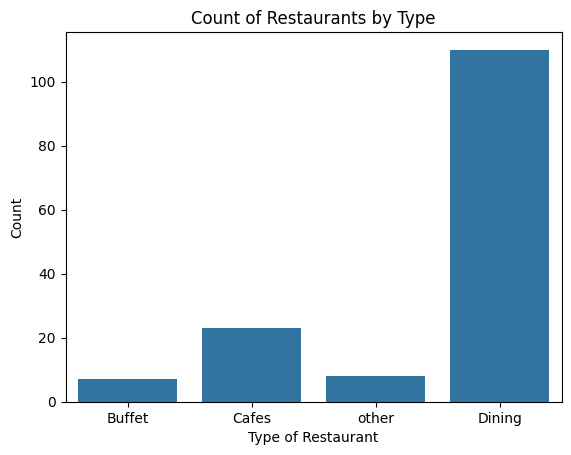

In [13]:
# Plot a countplot to visualize the number of restaurants for each 'Type of Restaurant'
sns.countplot(x=df['Listed In'])

# Labeling the x-axis as 'Type of Restaurant'
plt.xlabel('Type of Restaurant')

# Labeling the y-axis as 'Count' to represent the number of restaurants
plt.ylabel('Count')

# Adding a title to the plot
plt.title('Count of Restaurants by Type')

# Display the plot
plt.show()

**Conclusion:**

The analysis shows that dining-type restaurants are the most prevalent, indicating a strong customer preference for sit-down meals. This suggests that enhancing the in-restaurant experience could be key for businesses to attract and retain more customers.

## **Total Votes by Restaurant Type**

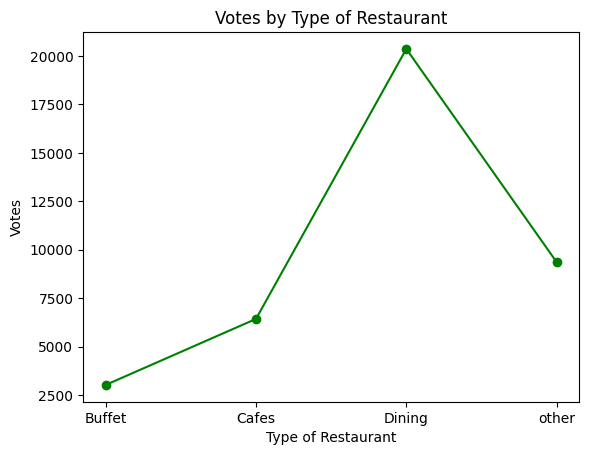

In [14]:
# Plot the total votes for each 'Type of Restaurant'
# Group the data by 'Listed In', sum the votes for each type, and plot the result
plt.plot(df.groupby('Listed In')['Votes'].sum(), c='green', marker='o')

# Labeling the x-axis as 'Type of Restaurant'
plt.xlabel('Type of Restaurant')

# Labeling the y-axis as 'Votes'
plt.ylabel('Votes')

# Title of the plot
plt.title('Votes by Type of Restaurant')

# Display the plot
plt.show()

**Conclusion:**

The plot shows that dining-type restaurants have received the highest number of votes, indicating that customers are more engaged with and likely to review or vote for these types of restaurants compared to others. This suggests a strong preference for dining experiences among customers.

## **Distribution of Restaurants by Rating**

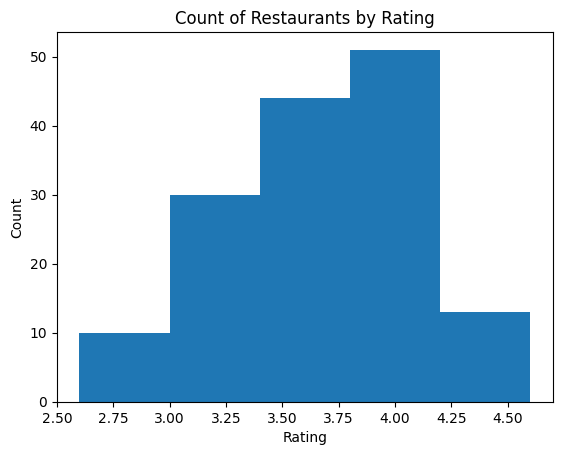

In [15]:
# Plot a histogram of the 'Rating' column with 5 bins
plt.hist(df['Rating'], bins=5)

# Labeling the x-axis as 'Rating'
plt.xlabel('Rating')

# Labeling the y-axis as 'Count'
plt.ylabel('Count')

# Adding a title to the plot
plt.title('Count of Restaurants by Rating')

# Display the plot
plt.show()

**Conclusion:**

The majority of restaurants fall within the rating range of 3.5 to 4. This indicates that most establishments are rated as above average, reflecting a generally positive customer experience, but there's still room for improvement to achieve higher ratings.

## **Average Order Spending By Couples**

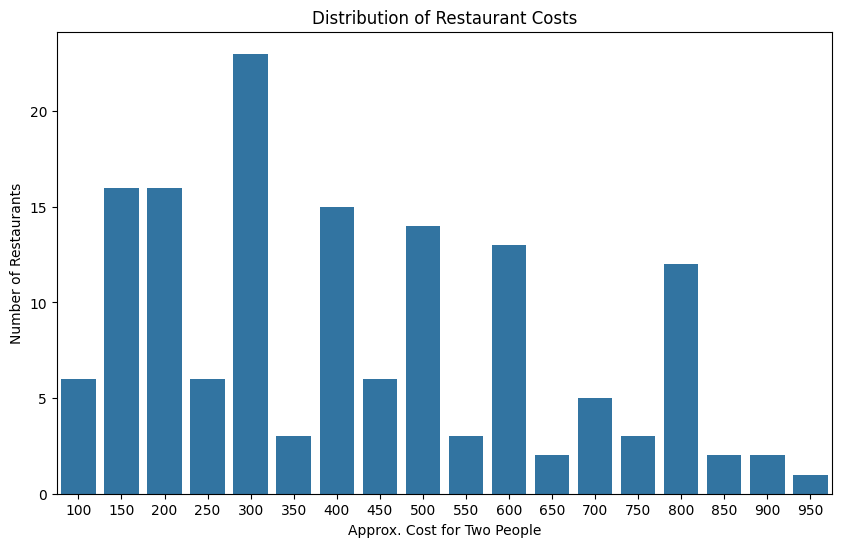

In [16]:
# Plot a countplot for the 'Approx. Cost' column to visualize spending habits
plt.figure(figsize=(10, 6))  # Adjusting figure size for better readability
sns.countplot(x=df['Approx. Cost'])

# Labeling the x-axis as 'Approximate Cost for Two People'
plt.xlabel('Approx. Cost for Two People')

# Labeling the y-axis as 'Count'
plt.ylabel('Number of Restaurants')

# Adding a title to the plot
plt.title('Distribution of Restaurant Costs')

# Display the plot
plt.show()

**Conclusion:**

The majority of couples prefer restaurants with an approximate cost of ₹300 for two people. This suggests that ₹300 is the most popular price range for dining, making it a common budget choice among couples.

## **Mode with Highest Average Rating**

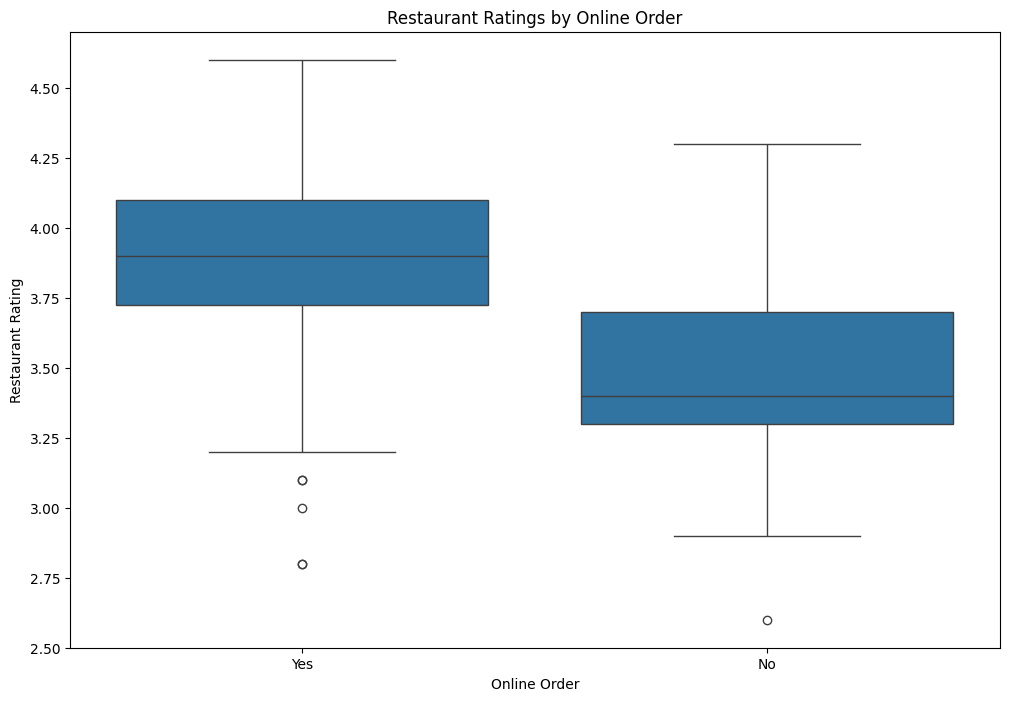

In [25]:
# Set the figure size to 12x8 for better readability
plt.figure(figsize=(12,8))

# Create a boxplot to compare ratings between online and offline orders
sns.boxplot(df, x='Online Order', y='Rating')

# Add labels for the x-axis, y-axis, and title
plt.xlabel('Online Order')
plt.ylabel('Restaurant Rating')
plt.title('Restaurant Ratings by Online Order')

# Display the plot
plt.show()

**Conclusion:**

Restaurants offering offline orders tend to receive lower average ratings compared to those providing online ordering services. This suggests a possible preference for the convenience and experience associated with online orders.

## **Heatmap of Restaurant Types and Online Order Availability**

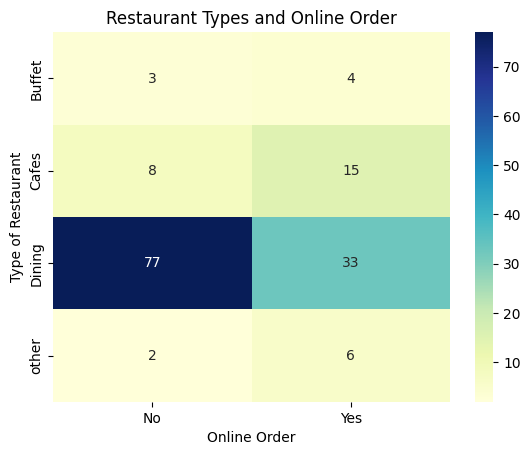

In [30]:
# Create a pivot table to count the number of restaurants by 'Type of Restaurant' (Listed In) and 'Online Order' availability
pivot_table = df.pivot_table(index='Listed In', columns='Online Order', aggfunc='size', fill_value=0)

# Create a heatmap to visualize the counts in the pivot table
# 'annot=True' displays the count values on the heatmap
# 'cmap' is set to 'YlGnBu' for a color gradient from yellow to green to blue
# 'fmt="d"' formats the values as integers
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

# Add labels for the x-axis, y-axis, and title
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.title('Restaurant Types and Online Order')

# Display the heatmap
plt.show()

**Conclusion**:

Dining restaurants primarily accept offline orders, while cafes predominantly handle online orders. This suggests that customers prefer to place orders in person at restaurants, but favor online orders when dining at cafes.

## **Conclusion**

The analysis of the restaurant dataset reveals key insights into customer preferences, restaurant types, and ordering methods. The majority of customers prefer dining in at restaurants, reflected by higher offline order volumes, especially in traditional dining establishments. Cafes, on the other hand, receive more online orders, indicating a growing trend of convenience-based food delivery in less formal dining settings.

Additionally, most restaurants receive ratings between 3.5 and 4.0, suggesting that overall customer satisfaction is moderate. Restaurants with online ordering options tend to receive slightly higher average ratings compared to those relying solely on offline orders. This indicates that the ease of online ordering contributes positively to customer experience.

In summary, while dining remains the preferred mode for traditional restaurants, the rise of online orders, especially for cafes, highlights the shift towards digital convenience in the food industry. Understanding these trends allows restaurant owners to adapt their services to better meet customer demands.